In [1]:
import numpy as np
from PIL import Image
import pickle
import os
import pickle
import cv2
import h5py

In [2]:
def Center(img, new_height, new_width):
    cImg = 255*np.ones((new_height,new_width,3))
    width =  np.size(img,1)
    height = np.size(img,0)

    left = int((new_width - width)/2.)
    top = int(((new_height - height)/2.))
    right = int(((width + new_width)/2.))
    bottom = int(((height + new_height)/2.))
    cImg[top:bottom, left:right,:] = img
    return cImg

In [3]:
x = []
y = []

j = k = 1
arr = []
path = os.listdir('/kaggle/input/icdar2011-nl-cn/sigComp2011 Full Dataset/sigComp2011-trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/')
path.sort(key=str.lower)

for i in range(len(path)):
    if(path[i][2] == str(j)):
        img = cv2.imread('/kaggle/input/icdar2011-nl-cn/sigComp2011 Full Dataset/sigComp2011-trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/'+path[i]+'')
        #img  = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        a = np.asarray(img)
        a = Center(a,551,1117)
        x.append(a)
        y1 = np.zeros((10))
        y1[j-1] = 1
        y.append(y1)
        k =k + 1
    elif(j<10):
        j = j + 1
        print('j='+str(j))
    else:
        img = cv2.imread('/kaggle/input/icdar2011-nl-cn/sigComp2011 Full Dataset/sigComp2011-trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/'+path[i]+'')
        #img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        a = np.asarray(img)
        a = Center(a,551,1117)
        x.append(a)
        y1 = np.zeros((10))
        y1[j-1] = 1
        y.append(y1)
        k =k+1
print('k='+str(k))        

j=2
j=3
j=4
j=5
j=6
j=7
j=8
j=9
j=10
k=227


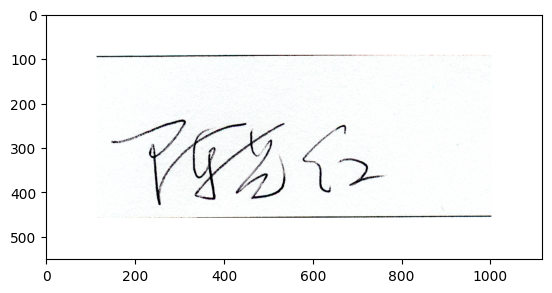

In [4]:
from matplotlib import pyplot as plt
plt.imshow(np.uint8(x[0]))
plt.show()

In [5]:
import h5py

hf = h5py.File('data_1.h5', 'w')
hf.create_dataset('dataset_1', data=x)
hf.create_dataset('dataset_2', data=y)
hf.close()

In [6]:
x = []

a = b = 0 
path = os.listdir('/kaggle/input/icdar2011-nl-cn/sigComp2011 Full Dataset/sigComp2011-trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/')
path.sort(key = lambda sample: sample[1:3])

for i in range(10):
  y = []
  for j in range(b,len(path)):
    if(path[j][1:3] == str(i+1).zfill(2)):
        img = cv2.imread('/kaggle/input/icdar2011-nl-cn/sigComp2011 Full Dataset/sigComp2011-trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine/'+path[j]+'')
        img  = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        arr = np.asarray(img)
        arr = cv2.resize(arr,(1117,551),interpolation= cv2.INTER_AREA)
        y.append(arr)
        a = a + 1
        print(a)
        if(a==235):
          x.append(np.asarray(y))
    else:
      print('...............')
      x.append(np.asarray(y))
      b = a
      break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
...............
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
...............
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
...............
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
...............
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
...............
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
...............
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
...............
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
...............
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
...............
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235


In [7]:
x[0].shape
len(x)

10

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import h5py

import keras
from keras.models import  Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers

# from keras.utils import np_utils

# InceptionV3 model imports
from keras.applications.inception_v3 import InceptionV3

from keras.models import load_model

2024-09-15 19:51:12.558053: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-15 19:51:12.558166: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-15 19:51:12.684402: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
x[0].shape

(24, 551, 1117)

In [10]:
import numpy as np
x = np.asarray(x)
y = np.asarray(y)
p = np.random.permutation(x.shape[0])
x = x[p]
y = y[p]
X_train = x[0:200]
y_train = y[0:200]
X_val = x[200:226]
y_val = y[200:226]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
# from tensorflow.keras.applications.inception_v3 import InceptionV3


In [ ]:
base_model = InceptionV3(include_top = False, weights='imagenet', input_shape= (551,1117,3))

In [ ]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
# and a logistic layer -- let's say we have 10 classes
predictions = Dense(10, activation='softmax')(x)

In [ ]:
m = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  
m.summary()

In [ ]:
history = m.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 20, batch_size= 32, verbose=2)

In [ ]:
conv_activation = 'relu'
deep_activation = 'relu'

input_shape = (551, 1117, 3)
num_classes = 10

model = Sequential()

model.add(
	Conv2D(
		16,
		kernel_size=(8, 8),
		strides=(1, 1),
		activation=conv_activation,
		input_shape=input_shape,
		data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (16, 16), activation=conv_activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (16, 16), activation=conv_activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (16, 16), activation=conv_activation))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# model.add(Dense(100, activation=deep_activation))
model.add(Dense(100, activation=deep_activation))
model.add(Dense(50, activation=deep_activation))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  

model.summary()


In [ ]:
m.save('tranfer_20ep_overfit.h5')

In [ ]:
model.save('tranfer_20ep_l2+dropout.h5')

In [ ]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
# and a logistic layer -- let's say we have 10 classes
predictions = Dense(10, activation='softmax',activity_regularizer= regularizers.l2(0.01))(x)

m = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_info = m.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 20, batch_size= 32, verbose=2)

In [ ]:
hf = h5py.File('data_1.h5', 'r')
x = hf.get('dataset_1')
y = hf.get('dataset_2')

In [ ]:
import numpy as np
x = np.asarray(x)
y = np.asarray(y)
p = np.random.permutation(x.shape[0])
x = x[p]
y = y[p]
X_test = x[0:100]
y_test = y[0:100]

In [ ]:
history = model.evaluate(x=X_test, y=y_test, batch_size= 16 ,verbose=1)


In [ ]:
history